In [1]:
# 1. Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2. Lire le dataset brut
df_raw = pd.read_csv("Eartquakes-1990-2023.csv")


In [3]:
# Nombre total d'échantillons (lignes) et de caractéristiques (colonnes)
print(f"Nombre total d'échantillons : {df_raw.shape[0]}")
print(f"Nombre total de caractéristiques : {df_raw.shape[1]}")

# Nombre de doublons
nb_doublons = df_raw.duplicated().sum()
print(f"Nombre de doublons : {nb_doublons}")

# Nombre de valeurs manquantes par colonne
print("\nNombre de valeurs manquantes par colonne :")
print(df_raw.isnull().sum())

# Liste des colonnes et de leur type
print("\nListe des caractéristiques et leur type :")
for col in df_raw.columns:
    print(f"Caractéristique : {col} | Type : {df_raw[col].dtypes}")



Nombre total d'échantillons : 3445751
Nombre total de caractéristiques : 12
Nombre de doublons : 16869

Nombre de valeurs manquantes par colonne :
time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

Liste des caractéristiques et leur type :
Caractéristique : time | Type : int64
Caractéristique : place | Type : object
Caractéristique : status | Type : object
Caractéristique : tsunami | Type : int64
Caractéristique : significance | Type : int64
Caractéristique : data_type | Type : object
Caractéristique : magnitudo | Type : float64
Caractéristique : state | Type : object
Caractéristique : longitude | Type : float64
Caractéristique : latitude | Type : float64
Caractéristique : depth | Type : float64
Caractéristique : date | Type : object


In [4]:
# Suppression des doublons
df_cleaned = df_raw.drop_duplicates()

# Suppression des lignes avec valeurs manquantes
df_cleaned = df_cleaned.dropna()

# Supprimer les séismes avec une magnitude négative et >10° sur Richter
df_cleaned = df_cleaned[(df_cleaned['magnitudo'] >= 0) & (df_cleaned['magnitudo'] <= 10)]

# Supprimer les séismes avec une profondeur négative
df_cleaned = df_cleaned[df_cleaned['depth'] >= 0]

# longitude
df_cleaned = df_cleaned[(df_cleaned['longitude'] >= -180) & (df_cleaned['longitude'] <= 180)]

# latitude
df_cleaned = df_cleaned[(df_cleaned['latitude'] >= -90) & (df_cleaned['latitude'] <= 90)]

# significance positive seulement
df_cleaned = df_cleaned[df_cleaned['significance'] >= 0]

# tsunami
df_cleaned = df_cleaned[df_cleaned['tsunami'].isin([0, 1])]  # doit être binaire (0 ou 1)

#les collonnes catégoricales sans espace au début et avec la premiére lettre en majiscule et les autres lettres en miniscule
colonnes_categorielle = ['place', 'state', 'status', 'data_type']
for col in colonnes_categorielle:
    df_cleaned[col] = df_cleaned[col].str.strip()
    df_cleaned[col] = df_cleaned[col].str.title()

# Correction propre de la colonne 'date'
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='mixed', errors='coerce')

# Suppression des lignes où la date est définitivement mauvaise
df_cleaned = df_cleaned.dropna(subset=['date'])

# Sauvegarder dans un nouveau fichier CSV
df_cleaned.to_csv('dataset_cleaned.csv', index=False)

print(f"✅ Dataset nettoyé sauvegardé avec succès ! Nombre final d'échantillons : {df_cleaned.shape[0]} lignes.")

✅ Dataset nettoyé sauvegardé avec succès ! Nombre final d'échantillons : 3183688 lignes.


In [5]:
# Statistiques numériques
print("===== Statistiques descriptives numériques =====")
print(df_cleaned.describe())

===== Statistiques descriptives numériques =====
               time       tsunami  significance     magnitudo     longitude  \
count  3.183688e+06  3.183688e+06  3.183688e+06  3.183688e+06  3.183688e+06   
mean   1.249757e+12  4.758632e-04  7.784814e+01  1.851792e+00 -9.952316e+01   
std    2.964569e+11  2.180910e-02  1.041180e+02  1.268777e+00  7.948873e+01   
min    6.311534e+11  0.000000e+00  0.000000e+00  0.000000e+00 -1.799997e+02   
25%    1.031147e+12  0.000000e+00  1.500000e+01  9.800000e-01 -1.471104e+02   
50%    1.286011e+12  0.000000e+00  3.500000e+01  1.500000e+00 -1.189453e+02   
75%    1.510043e+12  0.000000e+00  8.600000e+01  2.370000e+00 -1.156083e+02   
max    1.690629e+12  1.000000e+00  2.910000e+03  9.100000e+00  1.800000e+02   

           latitude         depth  
count  3.183688e+06  3.183688e+06  
mean   3.725176e+01  2.450189e+01  
std    2.104953e+01  5.657241e+01  
min   -8.442200e+01  0.000000e+00  
25%    3.396717e+01  3.837000e+00  
50%    3.786340e+01  8.

In [6]:
# Statistiques catégorielles
print("\n===== Statistiques descriptives catégorielles =====")
print(df_cleaned.describe(include=['object']))


===== Statistiques descriptives catégorielles =====
                             place    status   data_type       state
count                      3183688   3183688     3183688     3183688
unique                      520586         3          21         749
top     6 Km W Of Cobb, California  Reviewed  Earthquake  California
freq                         23099   2988312     3146758     1241131


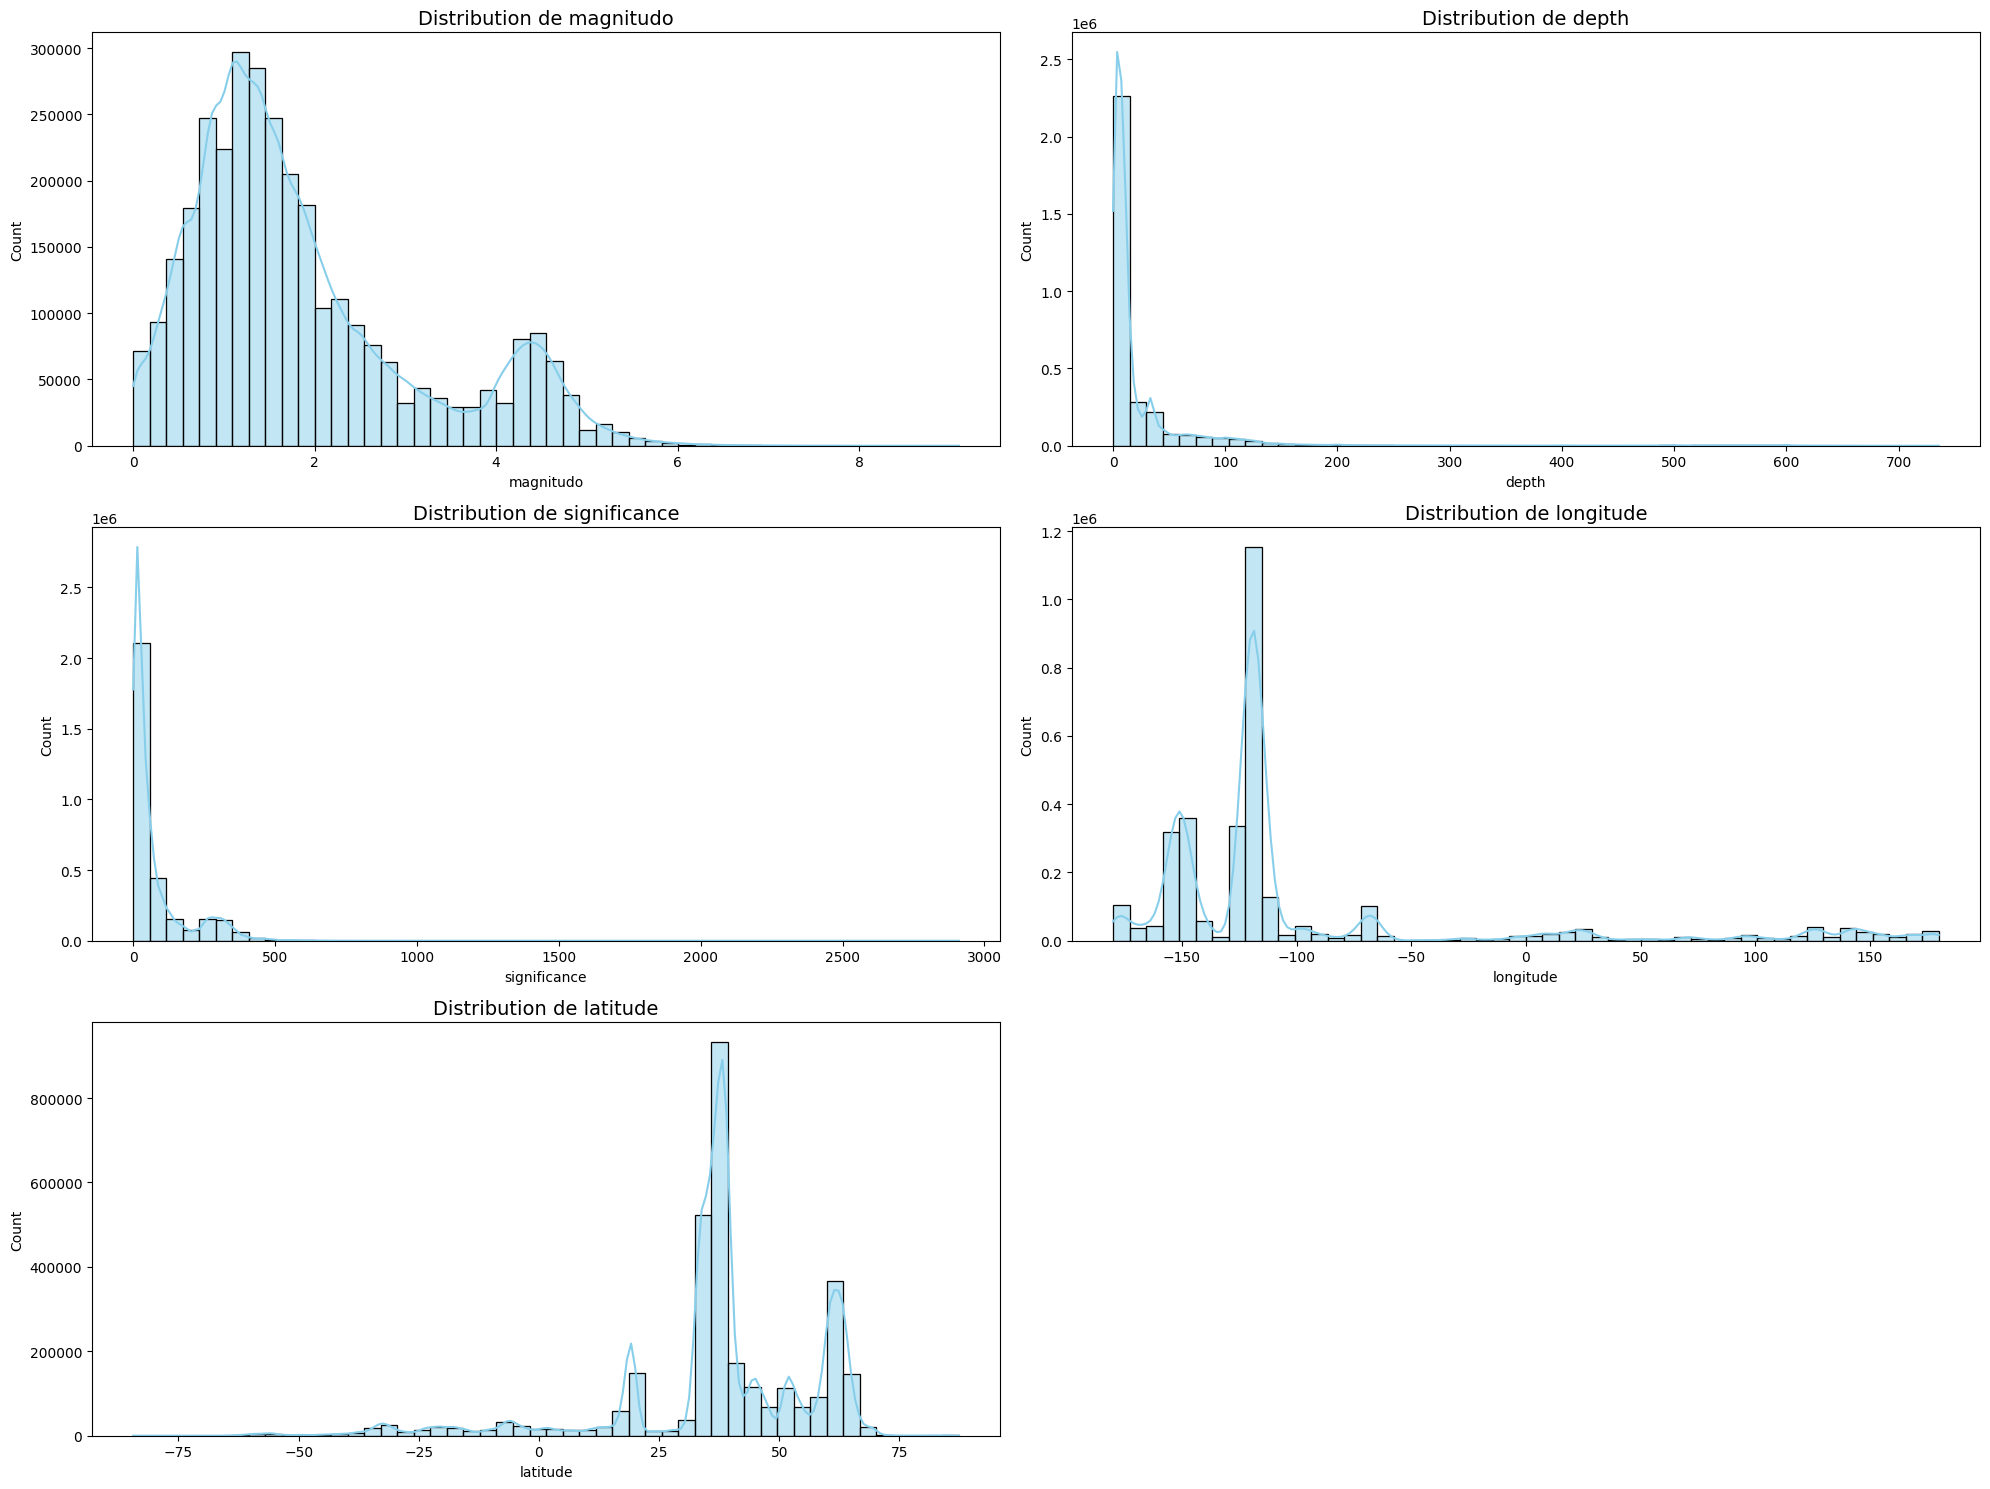

In [7]:
# Liste des colonnes numériques principales
colonnes_numeriques = ['magnitudo', 'depth', 'significance', 'longitude', 'latitude']

# Histogrammes
plt.figure(figsize=(20, 15))
for idx, col in enumerate(colonnes_numeriques):
    plt.subplot(3, 2, idx+1)
    sns.histplot(df_cleaned[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution de {col}', fontsize=14)

plt.tight_layout()
plt.savefig('histogrammes_variables_numeriques.png')  # Sauvegarde
plt.show()
plt.close()


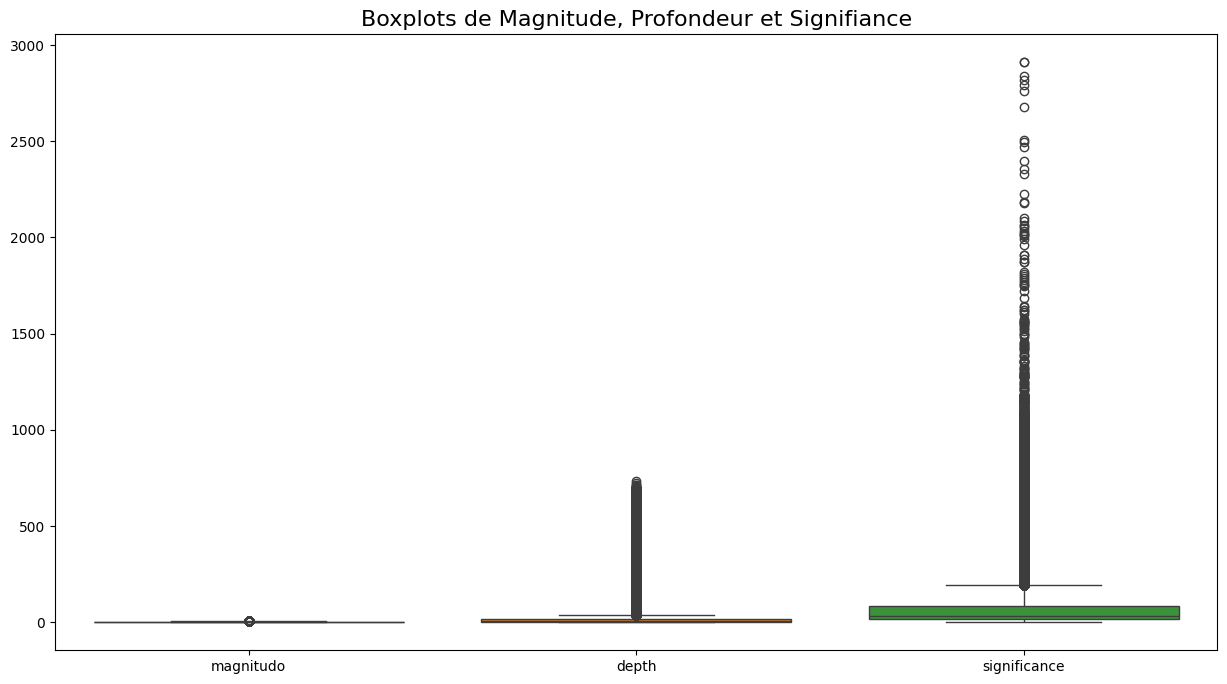

In [8]:
# Boxplots des grandeurs physiques numériques
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[['magnitudo', 'depth', 'significance']])
plt.title('Boxplots de Magnitude, Profondeur et Signifiance', fontsize=16)
plt.savefig('boxplots_magnitude_profondeur_signifiance.png')  # Sauvegarde
plt.show()
plt.close()

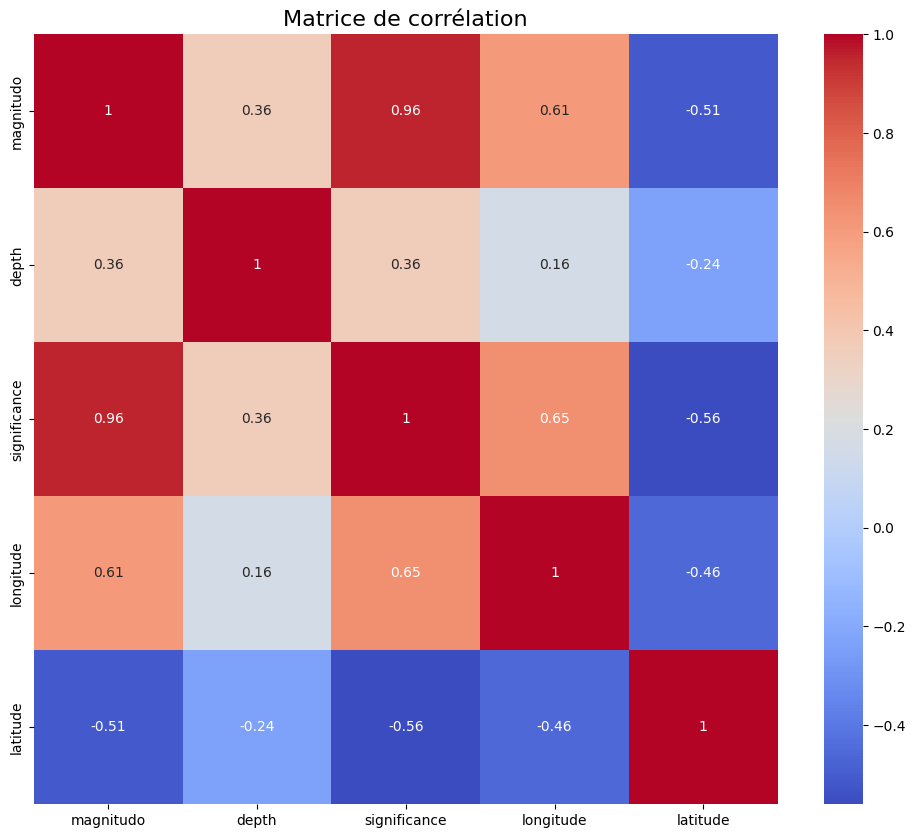

In [9]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[['magnitudo', 'depth', 'significance', 'longitude', 'latitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation', fontsize=16)
plt.savefig('heatmap_correlation.png')  # Sauvegarde
plt.show()
plt.close()



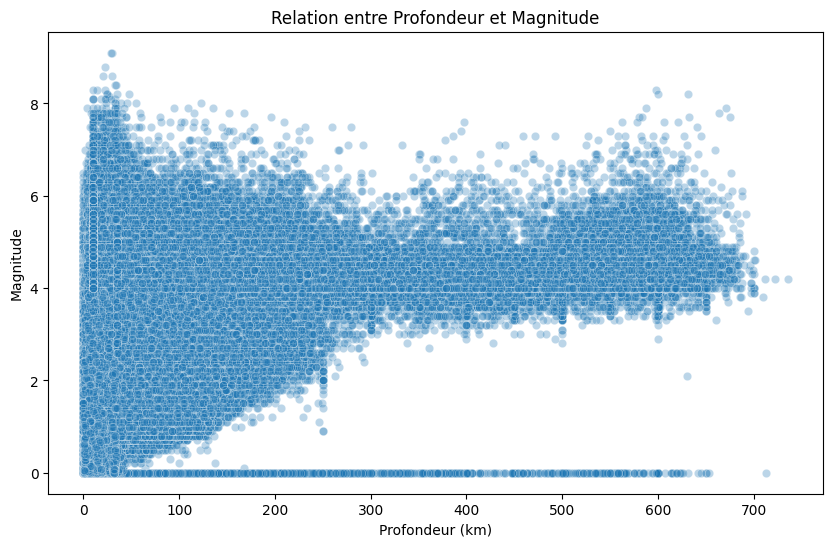

In [10]:
# Scatter Plot : Profondeur vs Magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitudo', data=df_cleaned, alpha=0.3)
plt.title('Relation entre Profondeur et Magnitude')
plt.xlabel('Profondeur (km)')
plt.ylabel('Magnitude')
plt.savefig('scatter_depth_vs_magnitude.png')  # Sauvegarde
plt.show()
plt.close()


<ipython-input-11-98dfebeb2598>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


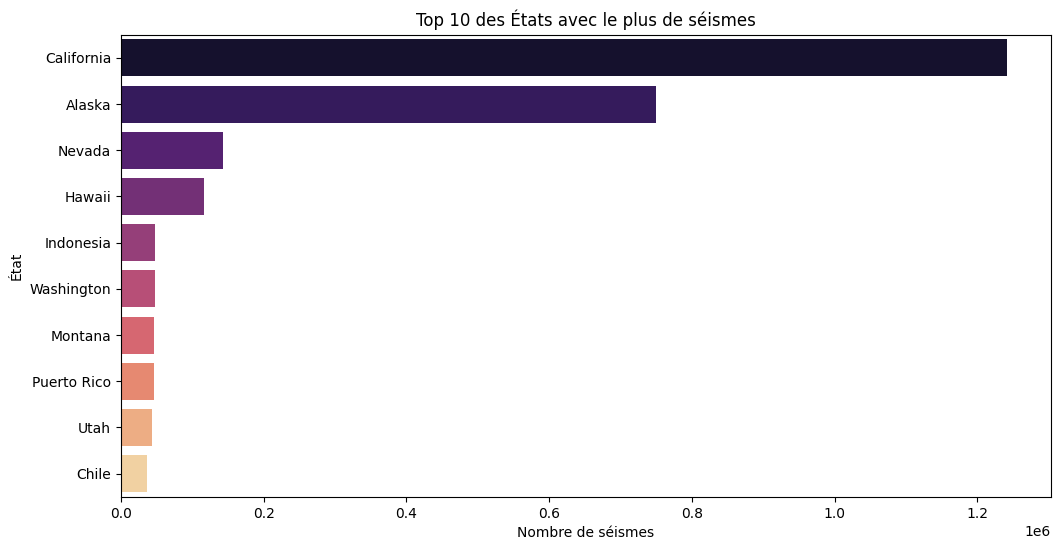

In [11]:
# Top 10 des états avec le plus de séismes
top_states = df_cleaned['state'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.title('Top 10 des États avec le plus de séismes')
plt.xlabel('Nombre de séismes')
plt.ylabel('État')
plt.savefig('barplot_top10_states.png')
plt.show()
plt.close()


<ipython-input-12-ff95ebc73fe2>:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('carte_mondiale_force_seismes.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


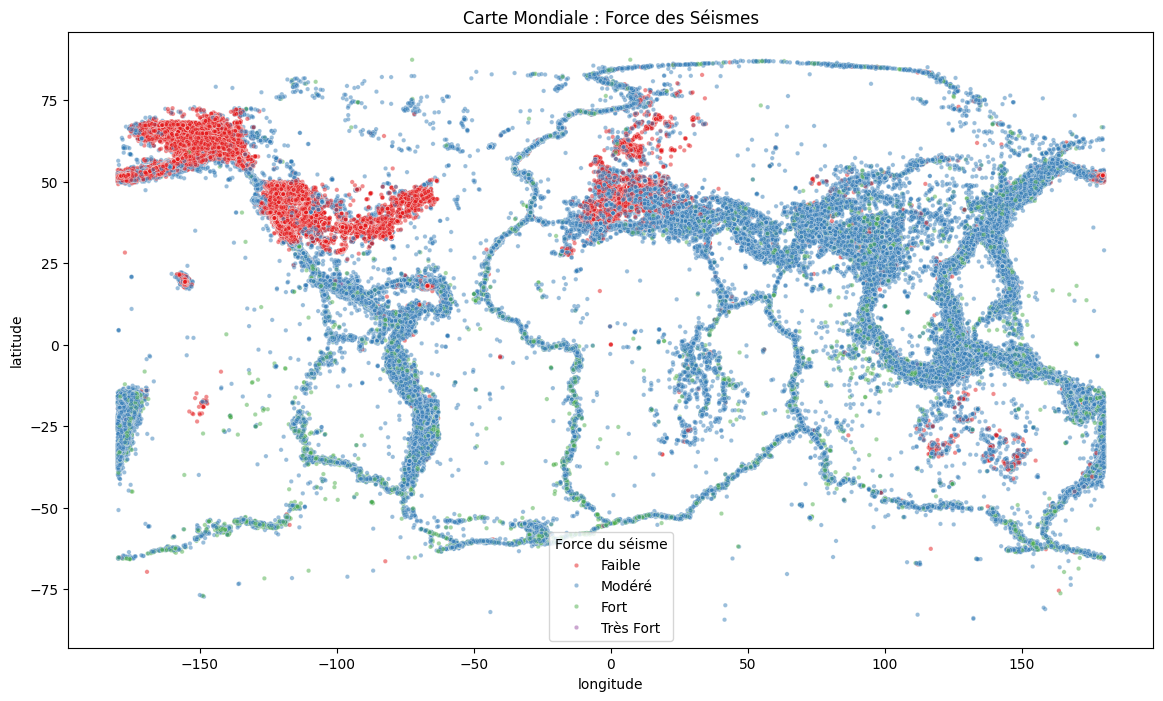

In [12]:
# Carte mondiale des séismes
conditions = [
    (df_cleaned['magnitudo'] < 3),
    (df_cleaned['magnitudo'] >= 3) & (df_cleaned['magnitudo'] < 5),
    (df_cleaned['magnitudo'] >= 5) & (df_cleaned['magnitudo'] < 7),
    (df_cleaned['magnitudo'] >= 7)
]
choices = ['Faible', 'Modéré', 'Fort', 'Très Fort']

df_cleaned['force_seisme'] = np.select(conditions, choices, default='Inconnu')

# Carte avec couleurs
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='force_seisme', data=df_cleaned, alpha=0.5, palette="Set1", s=10)
plt.title('Carte Mondiale : Force des Séismes')
plt.legend(title='Force du séisme')
plt.savefig('carte_mondiale_force_seismes.png')
plt.show()
plt.close()


In [13]:
def infos_seismes_forts(df):
    forts = df[df['magnitudo'] > 5]
    print(f"Nombre total de séismes forts (>5) : {forts.shape[0]}")
    print("\nAperçu des séismes forts :")
    print(forts[['place', 'state', 'magnitudo', 'depth', 'date']].head())
    return forts

# Appel
seismes_forts = infos_seismes_forts(df_cleaned)


Nombre total de séismes forts (>5) : 42628

Aperçu des séismes forts :
                                    place            state  magnitudo  depth  \
55                            Fiji Region      Fiji Region        5.4  599.5   
92   58 Km W Of Kirakira, Solomon Islands  Solomon Islands        5.2   36.7   
96        155 Km N Of Likisá, Timor Leste      Timor Leste        5.3  527.1   
107  185 Km Nne Of Fayaoué, New Caledonia    New Caledonia        5.3   10.0   
109          8 Km Nnw Of Cepitá, Colombia         Colombia        5.3  157.8   

                                date  
55  1990-01-01 07:49:35.570000+00:00  
92  1990-01-01 14:49:00.690000+00:00  
96  1990-01-01 16:07:27.320000+00:00  
107 1990-01-01 17:21:38.880000+00:00  
109 1990-01-01 18:03:19.250000+00:00  


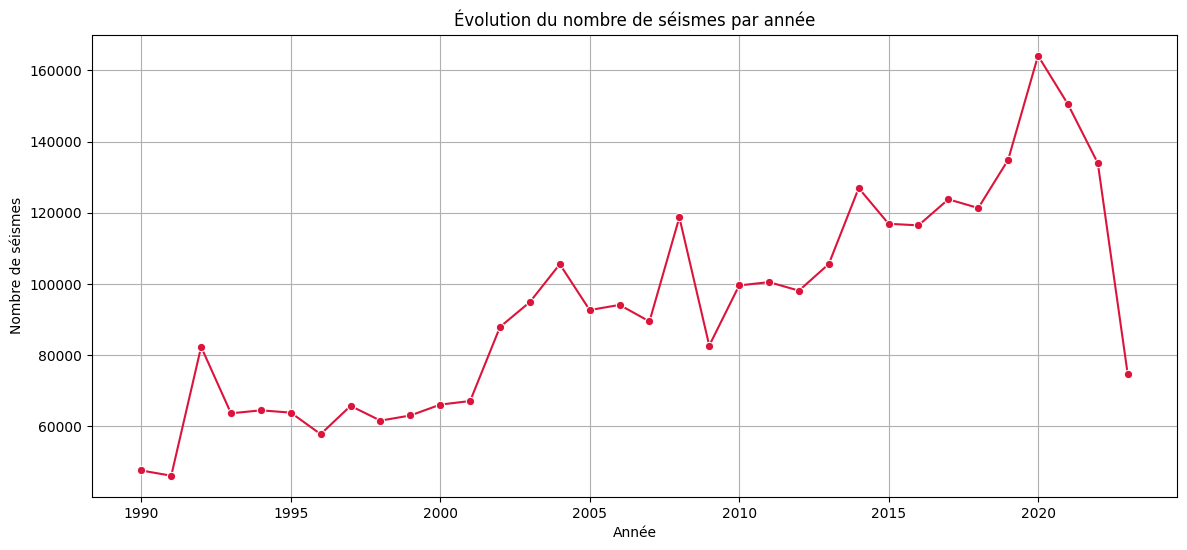

In [14]:
def evolution_seismes_par_annee(df):
    # Extraire l'année de la colonne 'date'
    df['year'] = df['date'].dt.year

    # Compter le nombre de séismes par année
    seismes_par_annee = df['year'].value_counts().sort_index()

    # Tracer
    plt.figure(figsize=(14,6))
    sns.lineplot(x=seismes_par_annee.index, y=seismes_par_annee.values, marker='o', color='crimson')
    plt.title('Évolution du nombre de séismes par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre de séismes')
    plt.grid(True)

    plt.savefig('evolution_seismes_par_annee.png')


    plt.show()
    plt.close()


# Appel de la fonction
evolution_seismes_par_annee(df_cleaned)
